In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings

#supress all warnings
warnings.filterwarnings("ignore")

# Read our data

In [4]:
data_path = os.path.join(os.path.dirname(os.getcwd()), "Data", "Housing_data.csv")
data = pd.read_csv(data_path)

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
data.shape

(20640, 10)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


## Check for missing values

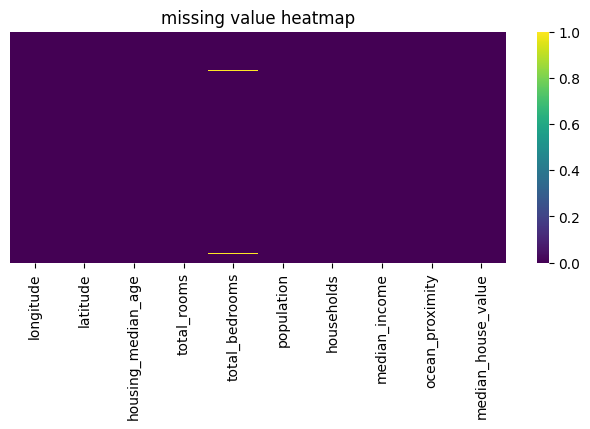

In [8]:
# plot the heatmap
plt.figure(figsize = (8,3))
sns.heatmap(data.isnull(), cmap = "viridis", cbar = True, yticklabels = False)
plt.title('missing value heatmap')
plt.show()

In [9]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [10]:
data[data["total_bedrooms"].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,NEAR OCEAN,220500
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,NEAR OCEAN,167400
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,<1H OCEAN,410700
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,<1H OCEAN,258100


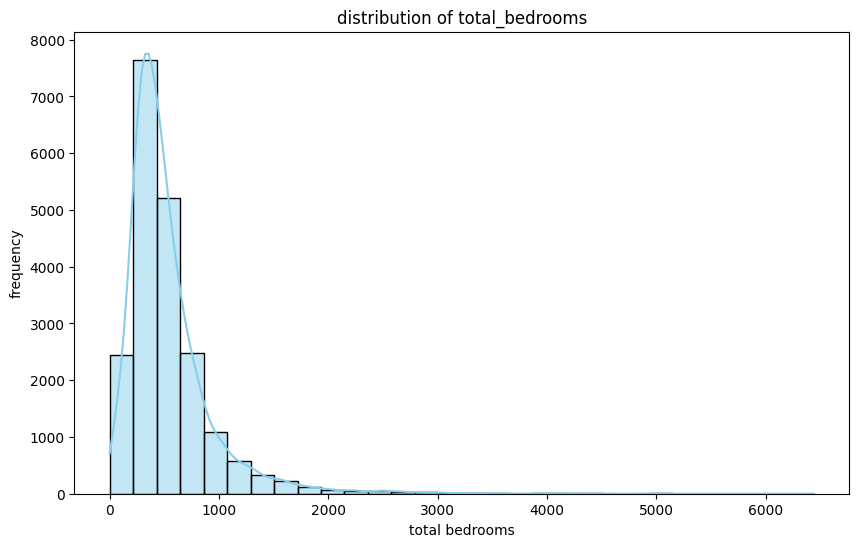

In [11]:
# creat a histogram
plt.figure(figsize = (10,6))
sns.histplot(data["total_bedrooms"].dropna(), kde = True, color = 'skyblue', bins = 30)
plt.title("distribution of total_bedrooms")
plt.xlabel('total bedrooms')
plt.ylabel('frequency')
plt.show()

In [12]:
median_value = data["total_bedrooms"].median()
data["total_bedrooms"] = data["total_bedrooms"].fillna(median_value)

In [13]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# check data types

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [15]:
data["total_bedrooms"] = data["total_bedrooms"].astype(int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  int32  
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(3), int32(1), int64(5), object(1)
memory usage: 1.5+ MB


# clean categorical features

In [17]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,342200


In [18]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [19]:
data["ocean_proximity"] = data["ocean_proximity"].str.replace(r'<1', '')

In [20]:
data["ocean_proximity"].value_counts()

ocean_proximity
H OCEAN       9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [21]:
data["ocean_proximity"] = data["ocean_proximity"].str.lower()

In [22]:
data["ocean_proximity"].value_counts()

ocean_proximity
h ocean       9136
inland        6551
near ocean    2658
near bay      2290
island           5
Name: count, dtype: int64

# Remove duplicate entries

In [24]:
data = data.drop_duplicates(keep = 'first', ignore_index = True)

## DRop useless features

In [25]:
data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,near bay,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,near bay,358500


In [27]:
data = data.drop(["longitude", "latitude"], axis = 1 )

In [28]:
data.head(2)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880,129,322,126,8.3252,near bay,452600
1,21,7099,1106,2401,1138,8.3014,near bay,358500


# Check outliers

In [32]:
def plot_dist(df):
    num_features = len(df.columns)
    num_rows = (num_features + 1)//2

    fig,axes = plt.subplots(ncols =2, nrows = num_rows, figsize = (10,6))
    axes = axes.flatten()

    for index, feature in enumerate(df.columns):
        ax =axes[index]
        sns.distplot(df[feature], kde = True, color = "blue", ax=ax)
    
    plt.suptitle("Distribution of numericalfeatures")
    plt.tight_layout()
    plt.show()

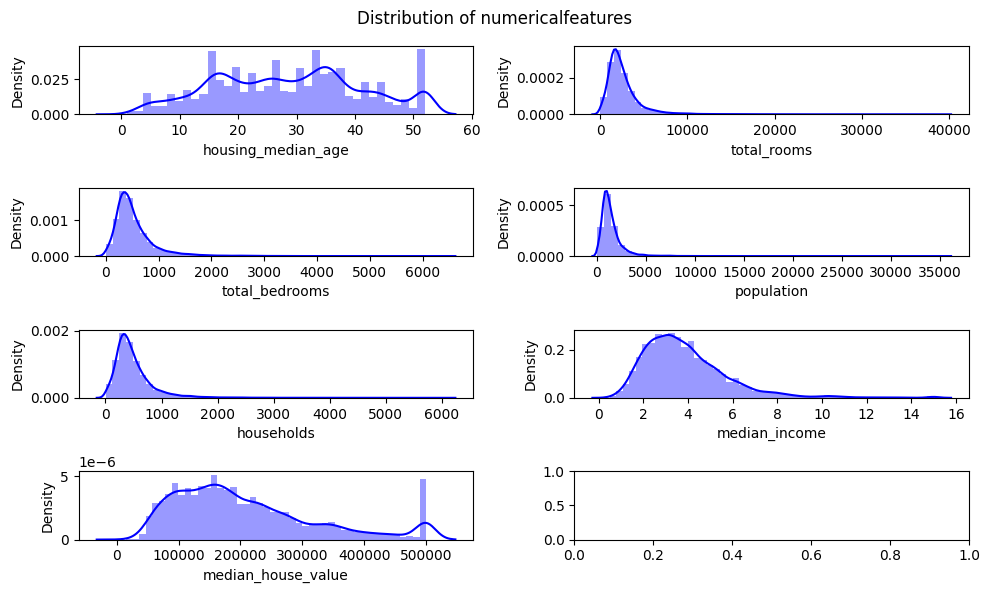

In [33]:
numerical_df = data.select_dtypes(exclude = 'object')
plot_dist(numerical_df)

In [47]:
def winsorize_percentile(data_frame, column, upper_percentile = 98):
    df = data_frame.copy()

    # compute upper threshold
    upper_threshold = np.percentile(df[column], upper_percentile)

    #Winsorize the specific column
    df[column] = np.where(df[column]> upper_threshold, upper_threshold, df[column])

    return df[column]

In [48]:
data["total_rooms"] = winsorize_percentile(data, column= "total_rooms")
data["total_bedrooms"] = winsorize_percentile(data, column= "total_bedrooms")
data["population"] = winsorize_percentile(data, column= "population")
data["households"] = winsorize_percentile(data, column= "households")
data["median_income"] = winsorize_percentile(data, column= "median_income")

In [49]:
numerical_df = data.select_dtypes(exclude = 'object')


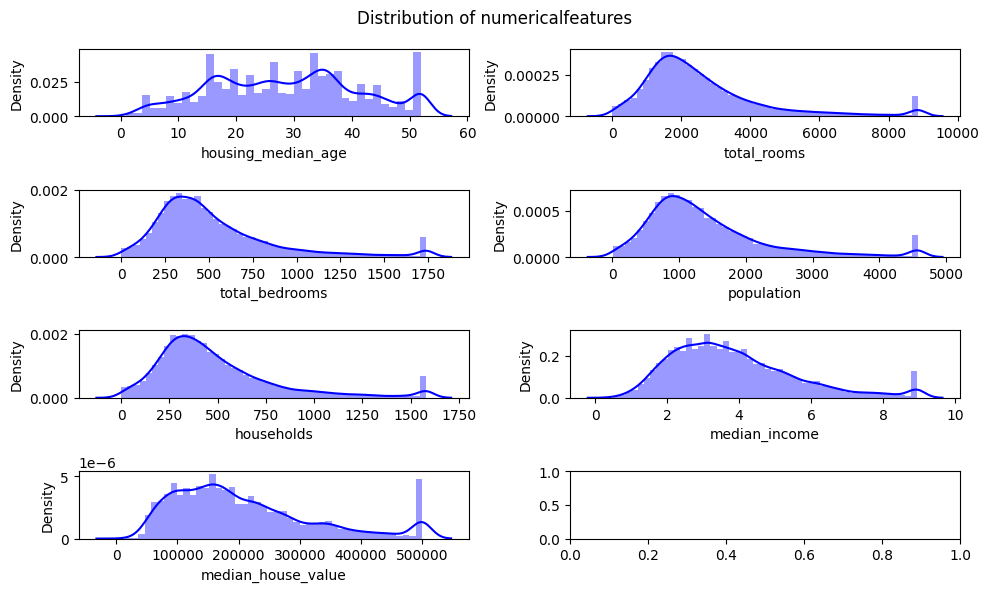

In [50]:
plot_dist(numerical_df)

In [51]:
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,41,880.0,129.0,322.0,126.0,8.3252,near bay,452600
1,21,7099.0,1106.0,2401.0,1138.0,8.3014,near bay,358500
2,52,1467.0,190.0,496.0,177.0,7.2574,near bay,352100
3,52,1274.0,235.0,558.0,219.0,5.6431,near bay,341300
4,52,1627.0,280.0,565.0,259.0,3.8462,near bay,342200


In [52]:
data.to_csv("../Data/clean_data.csv", index = False)